In [9]:
# from __future__ import print_function
# import keras
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# import os
# import keras.backend as k
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from matplotlib import pyplot

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot
import os
import tensorflow as tf 


In [3]:

#load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #everytime loading data won't be so easy :)




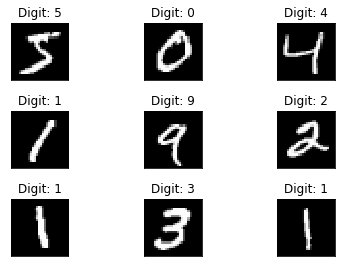

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [5]:
# 60,000 images
# each of them are of size 28x28
X_train.shape

(60000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28, 1)

In [6]:
img_rows, img_cols=28,28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

# Here, 1 is the number of channels 

X_train shape: (60000, 28, 28, 1)


In [28]:

# the first image:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [30]:
import numpy as np
set(np.ravel(X_train[0]))
# np.ravel converts everything to a vector 



{0.0,
 0.003921569,
 0.007843138,
 0.011764706,
 0.03529412,
 0.043137256,
 0.05490196,
 0.0627451,
 0.07058824,
 0.09019608,
 0.09411765,
 0.09803922,
 0.101960786,
 0.105882354,
 0.11764706,
 0.13725491,
 0.14117648,
 0.15294118,
 0.16862746,
 0.1764706,
 0.18039216,
 0.19215687,
 0.21568628,
 0.21960784,
 0.2509804,
 0.25882354,
 0.27450982,
 0.30588236,
 0.3137255,
 0.31764707,
 0.32156864,
 0.3529412,
 0.3647059,
 0.36862746,
 0.41960785,
 0.42352942,
 0.44705883,
 0.46666667,
 0.49411765,
 0.49803922,
 0.50980395,
 0.5176471,
 0.52156866,
 0.5294118,
 0.53333336,
 0.54509807,
 0.5803922,
 0.5882353,
 0.6039216,
 0.6117647,
 0.627451,
 0.6509804,
 0.6666667,
 0.67058825,
 0.6745098,
 0.6862745,
 0.7137255,
 0.7176471,
 0.7294118,
 0.73333335,
 0.74509805,
 0.7647059,
 0.7764706,
 0.7882353,
 0.8039216,
 0.8117647,
 0.83137256,
 0.8352941,
 0.85882354,
 0.8666667,
 0.88235295,
 0.8862745,
 0.8980392,
 0.93333334,
 0.9411765,
 0.94509804,
 0.9490196,
 0.95686275,
 0.96862745,
 0.976

### 1st step:
- Input is a 28x28 image, 32 convolution filters of 3x3 size are applied to it
- output after first layer:
- 32 channels of 26x26 images 

### 2nd Step:
- Input is 32 26x26 images
- 64 3x3 convolution filters are applied to this 
- First consider only one filter: when it sees that the input has 32 channels, it will create 32 replicas of the first filter
- So parameters for just that one filter wil be 3x3x32+1 
- But there 64 such filters, so = (3x3x32+1)*64 = 18496

### 3rd Step:
- Input is 64 24x24 images 
- A 2x2 Maxpool filter with stride 2 is applied to them
- Output is going to be 64 12x12 images 
- No parameters because this is Max Pooling 

In [ ]:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))



model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#choose the best features: pooling

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))


#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))

# flattening = everything will be converted to a vector

model.add(tf.keras.layers.Flatten())

# the vector is connected to a hidden layer of 128 neurons

model.add(tf.keras.layers.Dense(128, activation='relu'))


model.add(tf.keras.layers.Dropout(0.5))

#output layer of 10 categories 
model.add(tf.keras.layers.Dense(num_category, activation='softmax'))

In [39]:

model = tf.keras.models.Sequential()


#32 convolution filters used each of size 3x3
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='softmax',
                 input_shape=input_shape))


#64 convolution filters used each of size 3x3
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='softmax'))

#choose the best features via pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))

# flattening = everything will be converted to a vector
model.add(tf.keras.layers.Flatten())

# the vector is connected to a hidden layer of 128 neurons
model.add(tf.keras.layers.Dense(128, activation='softmax'))


model.add(tf.keras.layers.Dropout(0.5))

#output layer of 10 categories 

model.add(tf.keras.layers.Dense(num_category, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [41]:
9216*128+128

1179776

In [42]:
#Adaptive learning rate (adaDelta) is a form of gradient descent 
#categorical ce since we have multiple classes (10) 
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [44]:
# the data is divided into 128 batches/ bins
batch_size = 128
num_epoch = 50  # or change to 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 248s 530ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 2/50
469/469 [==============================] - 202s 431ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 3/50
469/469 [==============================] - 179s 383ms/step - loss: 2.3028 - accuracy: 0.0962 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 4/50
469/469 [==============================] - 184s 393ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 5/50
469/469 [==============================] - 175s 373ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 6/50
469/469 [==============================] - 151s 321ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 7/50
469/469 [==============================] - 114s 243ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 -

In [16]:
model.layers

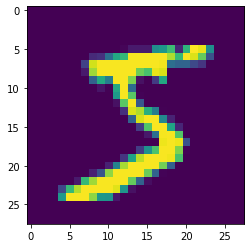

In [17]:

plt.imshow(X_train[0][:,:,0])

# this is original input image 28x28

1/1 [==============================] - 0s 117ms/step


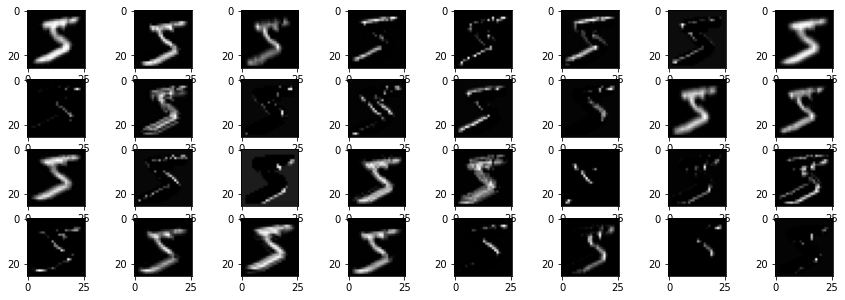

In [18]:

# this is the output after applying a convolution filter of size 3x3

model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

1/1 [==============================] - 0s 51ms/step


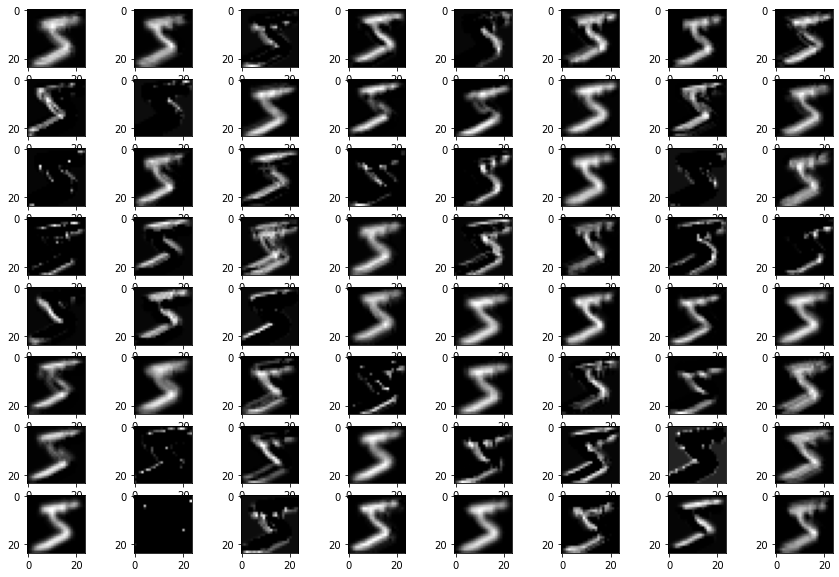

In [19]:
# this is after the 2nd layer - another 3x3 convolution filter, 64 of them  

model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

1/1 [==============================] - 0s 67ms/step


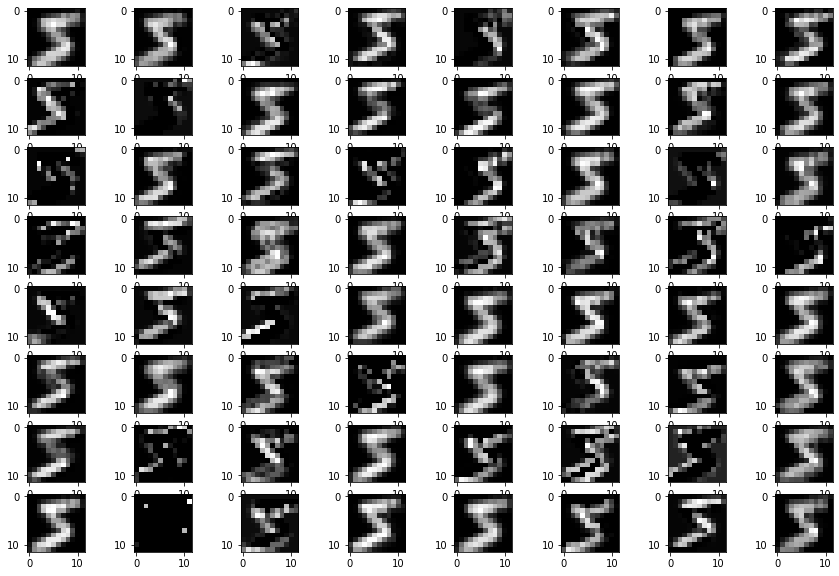

In [20]:
# this is the output after max pool 
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

1/1 [==============================] - 0s 53ms/step


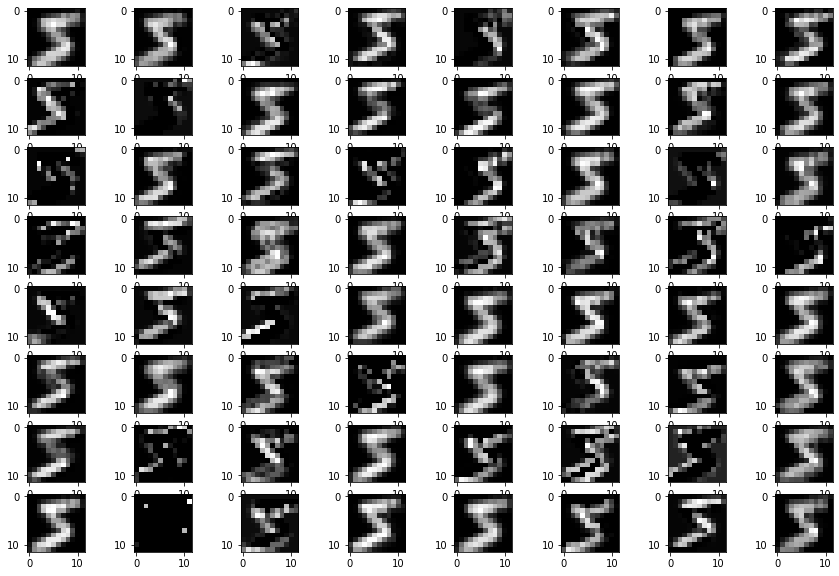

In [21]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

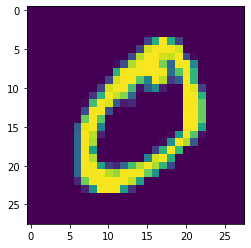

In [22]:
plt.imshow(X_train[1][:,:,0])

In [1]:
64*9+1

577

In [2]:
10*9+1

91

In [3]:
91/577

0.15771230502599654

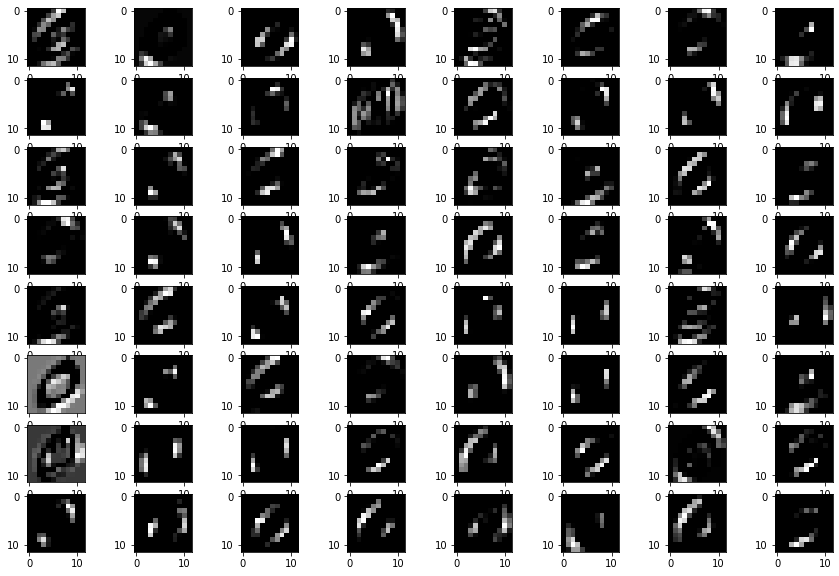

In [21]:
model2 = Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

In [49]:
cd\..

/Users


In [63]:
pip install  plotnn

  ERROR: Could not find a version that satisfies the requirement plotnn (from versions: none)
ERROR: No matching distribution found for plotnn
Note: you may need to restart the kernel to use updated packages.


In [69]:
import pydot